In [59]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Intro

As reported by Investopedia.com, Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. Travelers can often book an Airbnb for less than the cost of a hotel room, and Airbnb hosts list many different kinds of properties—single rooms, a suite of rooms, apartments, moored yachts, houseboats, entire houses, even a castle—on the Airbnb website. This idea is certainly favorable for those who are looking for affordable housing options as compared to hotels. With over two-hundred sixty million guests who have booked and stayed in Airbnb properties across the world, Airbnb administers tons of data from all over the world. As current students in the Los Angeles Area, **Pandas Express has decided to analyze Airbnb data pertaining to Los Angeles City in order to gain further insights of the relationships variables. As a result, a deeper understanding of the cause of certain factors will be attained in the context of the data.**

# Background

The data used for this project is from Inside Airbnb. Inside Airbnb is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world. By analyzing publicly available information about a city's Airbnb's listings, Inside Airbnb provides filters and key metrics so you can see how Airbnb is being used to compete with the residential housing market.The data behind the Inside Airbnb site is sourced from publicly available information from the Airbnb site, and the data has been analyzed, cleansed and aggregated where appropriate to faciliate public discussion.

# Data Organizing

In [141]:
# Same data with 106 columns
df2 = pd.read_csv('listings 3.csv')

The dataset has 45053 rows and 106 columns.
It contains 0 duplicates.


In [176]:
# Data with 16 columns
df1 = pd.read_csv('listings.csv')

# Checking shape
print("The dataset has {} rows and {} columns.".format(*df1.shape))
# ... and duplicates
print("It contains {} duplicates.".format(df1.duplicated().sum()))

The dataset has 45053 rows and 16 columns.
It contains 0 duplicates.


In [177]:
# Add 'listing_url', 'review_scores_rating'
index = ['listing_url', 'review_scores_rating']
df1['listing_url'] = df2.listing_url
df1['review_scores_rating'] = df2.review_scores_rating

# Delete empty column
df1.drop(['neighbourhood_group'], axis = 1, inplace = True)

# Omit Outliers

In [145]:
# Check which column is numeric 
df1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
listing_url                        object
review_scores_rating              float64
dtype: object

In [178]:
index = ['price', 'minimum_nights', 'number_of_reviews','calculated_host_listings_count', 'availability_365']
# Create a new dataframe that only contains numeric rows
df3 = df1[index]

In [179]:
def detect_outlier(data_1):
    feature_outliers=[]
    threshold=7
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    counter=0
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            feature_outliers.append(counter)
        counter += 1
    return feature_outliers


In [180]:
outliers = np.array([])
print("--Feature and Outlier Counts--\n")
for i in df3.columns:
    f_out = detect_outlier(df3[i])
    outliers = np.concatenate((outliers,np.asarray(f_out)))
    print(i ," outlier count :",len(f_out))
                              
outliers = np.unique(outliers,0)
print("Total Unique Outlier Index Count:",len(outliers))

--Feature and Outlier Counts--

price  outlier count : 152
minimum_nights  outlier count : 123
number_of_reviews  outlier count : 74
calculated_host_listings_count  outlier count : 309
availability_365  outlier count : 0
Total Unique Outlier Index Count: 657


In [182]:
# Create a new dataframe that omitted outliers
df4 = df1.drop(outliers,axis=0)
df4.describe()

id       host_id      latitude     longitude         price  \
count  4.439600e+04  4.439600e+04  44396.000000  44396.000000  44396.000000   
mean   2.220341e+07  8.142806e+07     34.052679   -118.322904    186.907559   
std    1.100411e+07  8.278083e+07      0.119507      0.155428    303.428926   
min    1.090000e+02  5.900000e+01     33.338480   -118.934220      0.000000   
25%    1.390042e+07  1.263034e+07     34.007340   -118.422490     70.000000   
50%    2.307901e+07  4.698851e+07     34.062970   -118.341845    110.000000   
75%    3.188351e+07  1.363326e+08     34.103372   -118.258628    185.000000   
max    3.860617e+07  2.946834e+08     34.811190   -117.652640   4300.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    44396.000000       44396.000000       36270.000000   
mean         5.393076          33.068677           1.920767   
std         10.720669          56.276461           1.959955   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.390000   
50%          2.000000           9.000000           1.230000   
75%          3.000000          39.000000           2.930000   
max        130.000000         451.000000          17.400000   

       calculated_host_listings_count  availability_365  review_scores_rating  
count                    44396.000000      44396.000000          35714.000000  
mean                         5.919317        161.171885             94.266786  
std                         10.887216        137.648830              8.688095  
min                          1.000000          0.000000             20.000000  
25%                          1.000000         22.000000             93.000000  
50%                          2.000000        135.000000             97.000000  
75%                          5.000000        315.000000            100.000000  
max                         92.000000        365.000000            100.000000

Although we already had omitted outliers, the price under $10 is either meaningless or fraud. 

In [184]:
# Delete price under $10
df5 = clean_data[df1["price"] >= 10]
df5.describe()

/Users/chan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


id       host_id      latitude     longitude         price  \
count  4.438700e+04  4.438700e+04  44387.000000  44387.000000  44387.000000   
mean   2.220360e+07  8.143009e+07     34.052689   -118.322901    186.945457   
std    1.100513e+07  8.278646e+07      0.119506      0.155423    303.448013   
min    1.090000e+02  5.900000e+01     33.338480   -118.934220     10.000000   
25%    1.390012e+07  1.263034e+07     34.007370   -118.422460     70.000000   
50%    2.308048e+07  4.698851e+07     34.062970   -118.341840    110.000000   
75%    3.188495e+07  1.363326e+08     34.103375   -118.258625    185.000000   
max    3.860617e+07  2.946834e+08     34.811190   -117.652640   4300.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    44387.000000       44387.000000       36262.000000   
mean         5.393854          33.067497           1.920741   
std         10.721612          56.276933           1.959904   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.390000   
50%          2.000000           9.000000           1.230000   
75%          3.000000          39.000000           2.930000   
max        130.000000         451.000000          17.400000   

       calculated_host_listings_count  availability_365  review_scores_rating  
count                    44387.000000      44387.000000          35706.000000  
mean                         5.919503        161.184333             94.265978  
std                         10.888186        137.645934              8.688854  
min                          1.000000          0.000000             20.000000  
25%                          1.000000         22.500000             93.000000  
50%                          2.000000        135.000000             97.000000  
75%                          5.000000        315.500000            100.000000  
max                         92.000000        365.000000            100.000000

# Drop Missing Values

In [162]:
df5.isna().sum()

id                                   0
name                                 6
host_id                              0
host_name                           16
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8125
reviews_per_month                 8125
calculated_host_listings_count       0
availability_365                     0
listing_url                          0
review_scores_rating              8681
dtype: int64

In [163]:
# Drop selected fields in place
df4.dropna(inplace=True, axis=0)    

/Users/chan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [165]:
df4.shape

(35688, 17)

In [173]:
df4.describe()

id       host_id      latitude     longitude         price  \
count  3.568800e+04  3.568800e+04  35688.000000  35688.000000  35688.000000   
mean   2.104552e+07  7.638688e+07     34.052909   -118.321061    161.648145   
std    1.072531e+07  7.886392e+07      0.113485      0.154314    212.819892   
min    1.090000e+02  5.900000e+01     33.338690   -118.934220     10.000000   
25%    1.316795e+07  1.157821e+07     34.005300   -118.421840     70.000000   
50%    2.195596e+07  4.339360e+07     34.062470   -118.340070    106.000000   
75%    3.013720e+07  1.272693e+08     34.102940   -118.257410    175.000000   
max    3.852527e+07  2.935799e+08     34.781480   -117.652640   4300.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    35688.000000       35688.000000       35688.000000   
mean         4.863399          41.093197           1.946659   
std          9.974233          60.066075           1.963738   
min          1.000000           1.000000           0.010000   
25%          1.000000           5.000000           0.420000   
50%          2.000000          17.000000           1.270000   
75%          3.000000          51.000000           2.970000   
max        130.000000         451.000000          17.400000   

       calculated_host_listings_count  availability_365  review_scores_rating  
count                    35688.000000      35688.000000          35688.000000  
mean                         5.668628        162.958137             94.266840  
std                          9.854487        135.660642              8.687776  
min                          1.000000          0.000000             20.000000  
25%                          1.000000         31.000000             93.000000  
50%                          2.000000        140.000000             97.000000  
75%                          5.000000        313.000000            100.000000  
max                         92.000000        365.000000            100.000000

The Average Daily Rate for Los Angeles is $159, according to Airbnb website. (https://www.airdna.co/vacation-rental-data/app/us/california/los-angeles/overview)
It is close to our cleaned data (df4).

# EDA

/Users/chan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


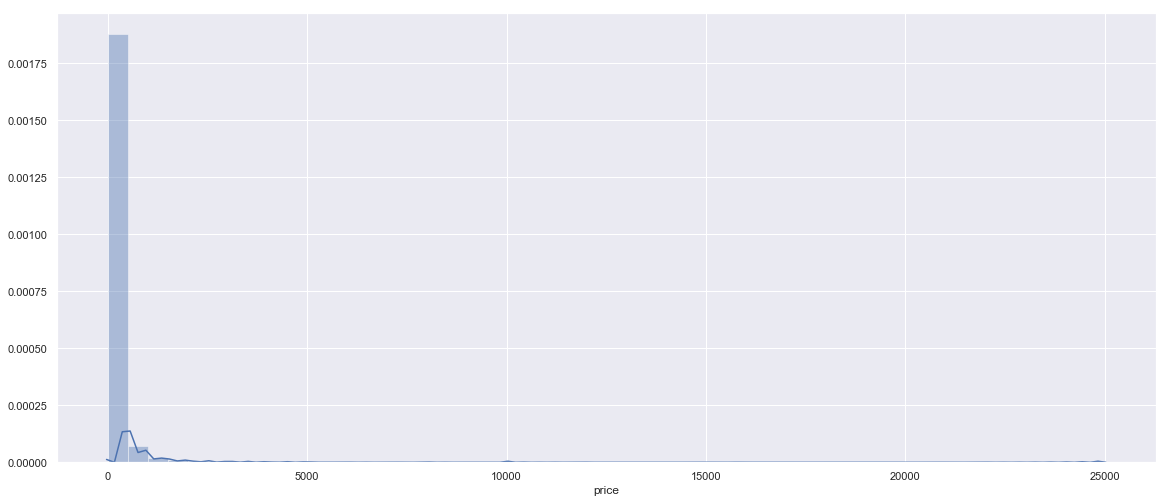

In [8]:
sns.distplot(df["price"])

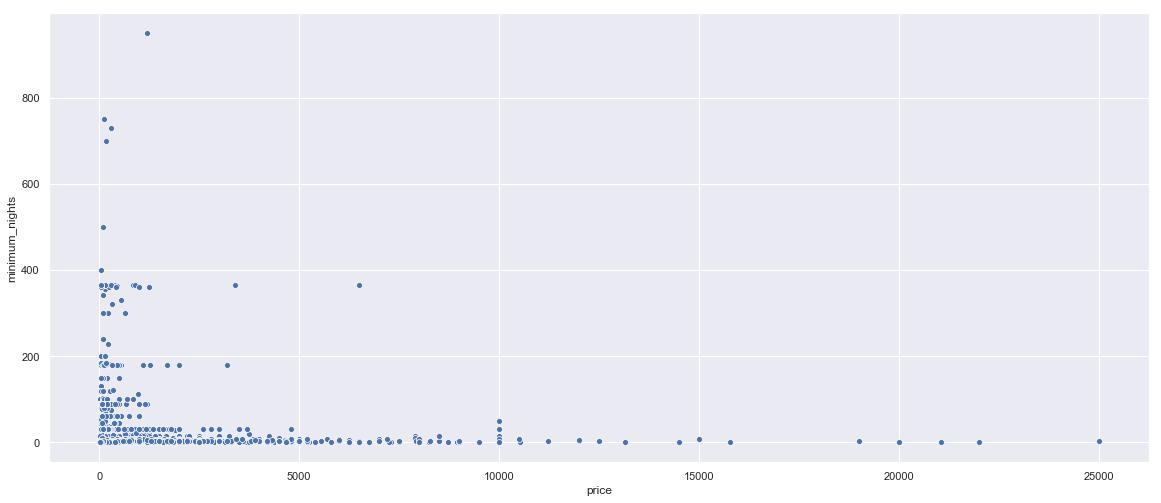

In [9]:
sns.scatterplot(x='price',y='minimum_nights',data=df)

In [10]:
# Hotel Distribution
import folium
from folium.plugins import HeatMap
m=folium.Map([33.98209,-118.38494],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

# Getting the room details

In [11]:
import plotly.offline as pyo
import plotly.graph_objs as go
roomdf = df.groupby('room_type').size()/df['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

We can see that Entire home/apt is most preferred(?)

<Figure size 720x432 with 0 Axes>

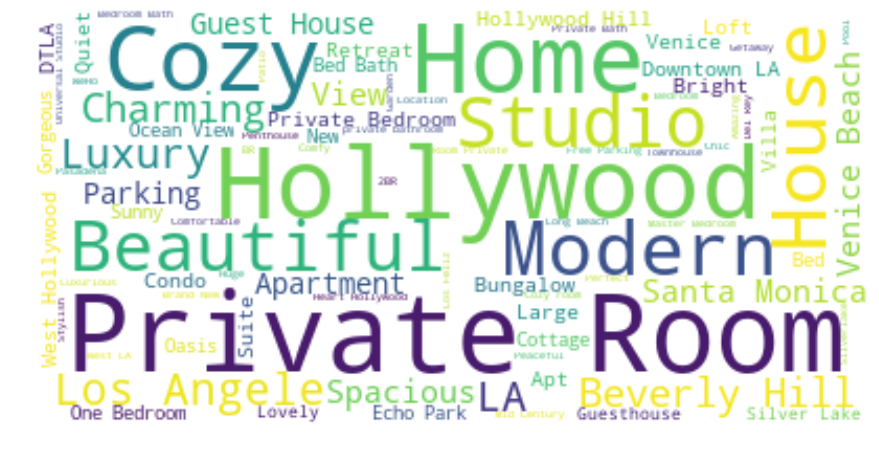

In [12]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

Shows frequency of words in the name of the listing that 'Hollywood', 'Private', and 'Room' appear most.

In [13]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in df.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)
        
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_20_w=Counter(_names_for_count_).most_common()
_top_20_w=_top_20_w[0:20]



#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_20_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'private'),
 Text(0, 0, 'room'),
 Text(0, 0, 'the'),
 Text(0, 0, 'hollywood'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'home'),
 Text(0, 0, 'with'),
 Text(0, 0, 'beach'),
 Text(0, 0, 'to'),
 Text(0, 0, 'house'),
 Text(0, 0, '&'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'of'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'and'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'la'),
 Text(0, 0, 'near'),
 Text(0, 0, '-')]

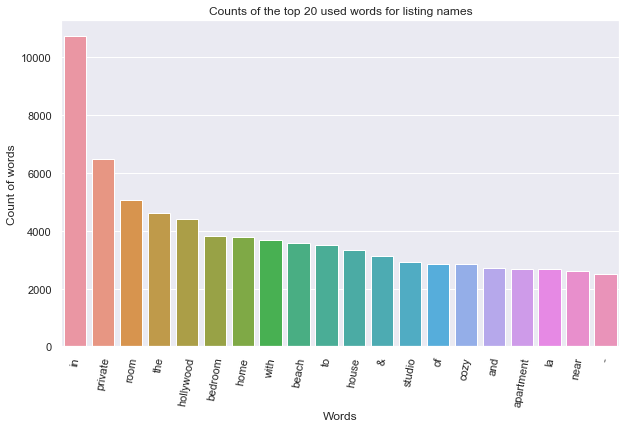

In [14]:
#we are going to use barplot for this visualization
plt.figure(figsize=(10,6))
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 20 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

# Sorting rooms according to maximum number of reviews

In [15]:
df1=df.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df1.head()

id                                         name   host_id  \
545    507927             Pirates of the Caribbean Getaway   2258135   
24      15440              Venice Beach Walkstreet Getaway     60473   
931    820227  MALIBU AIRSTREAM TRAILER MOUNTAIN ADVENTURE   4308078   
2043  1990543     Private 1906 Bungalow, 3 Blks from Beach  10265095   
657    593991           Best Beach Bed Breakfast & Bikes 2   2926347   

          host_name                          neighbourhood  latitude  \
545         Darrell                                Topanga  34.07284   
24            Maddy                                 Venice  33.99359   
931    Murray & Kay  Unincorporated Santa Monica Mountains  34.09261   
2043           Jeff                           Santa Monica  34.00434   
657   Johnny & Mark                                Del Rey  33.98264   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
545  -118.59539  Entire home/apt     95               2                900   
24   -118.46049  Entire home/apt    140               2                766   
931  -118.86987  Entire home/apt    249               1                742   
2043 -118.48437  Entire home/apt     95               1                732   
657  -118.42008     Private room     85               1                706   

      calculated_host_listings_count  availability_365  
545                                1               279  
24                                 1               290  
931                                1                23  
2043                               3                42  
657                                2                18

## Map below showing rooms with Highest number of reviews

In [16]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews')
Long=33.98209
Lat=-118.38494
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1


Rooms with the most number of reviews


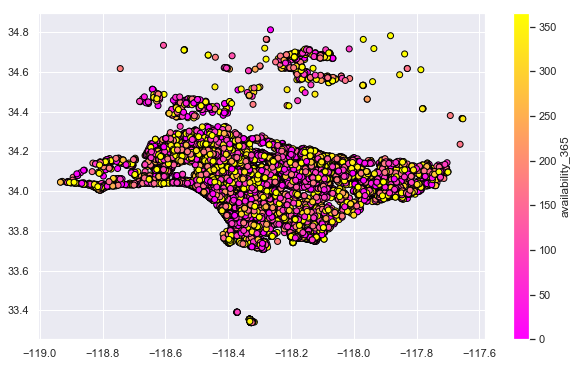

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1\
            , alpha=1)

cbar = plt.colorbar()
cbar.set_label('availability_365')

<Figure size 720x432 with 0 Axes>

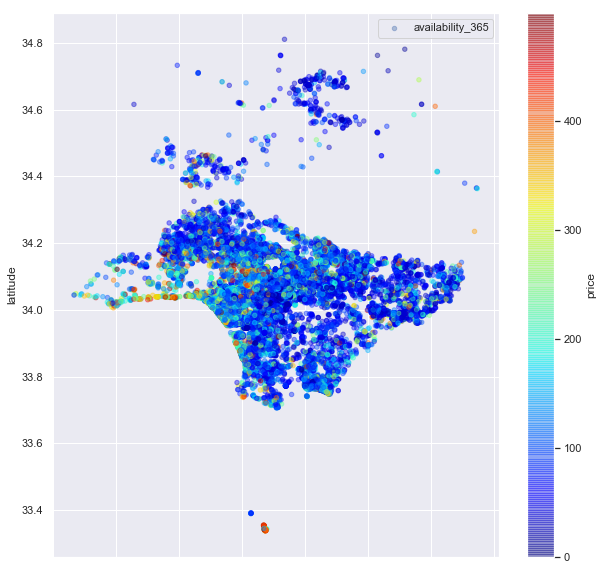

In [18]:
plt.figure(figsize=(10,6))
sub_6=df[df.price<500]
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

Red color dots are the apartment or rooms with higher price.

# Predictions using machine learnng model

In [19]:
#prepare data
df.drop(['name','id','host_name'],axis=1,inplace=True)

In [20]:
from sklearn import preprocessing
'''Encode labels with value between 0 and n_classes-1.'''

le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

df.sort_values(by='price',ascending=True,inplace=True)

df.head()

host_id  neighbourhood  latitude  longitude  room_type  price  \
18562   64946200            234  33.99194 -118.46946          2      0   
18500   64946200            234  33.99155 -118.46958          0      0   
15954  128864237             53  33.99522 -118.43324          0      0   
30348  106050725            152  34.16589 -118.35716          0      0   
15901    4804681            131  33.82912 -118.20102          2      0   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
18562               1                182                               6   
18500               1                  6                               6   
15954               1                 16                               1   
30348               2                  4                               3   
15901               2                 62                               2   

       availability_365  
18562                 8  
18500                 0  
15954                 0  
30348                 9  
15901               344

## Train a model

In [11]:
import foo
from foo import bar
#Train Linear Regression model

lm = LinearRegression()

X = df[['host_id','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

ModuleNotFoundError: No module named 'foo'

## Getting predictions

In [9]:
predicts = lm.predict(X_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

NameError: name 'lm' is not defined

In [10]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()


NameError: name 'go' is not defined

# Main

# Data Analyzing

# Conclusion

# Limitation